In [0]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [45]:
# Cargar data
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
# Numero de datos
diabetes.shape

(768, 9)

In [0]:
# Seleccion de data
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = diabetes[feature_cols]
y = diabetes.Outcome

In [0]:
# Separamos datos de entrenamiento y de prueba
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [49]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
# Prediccion del X_test
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [51]:
# Matriz de confusion
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[119  11]
 [ 26  36]]


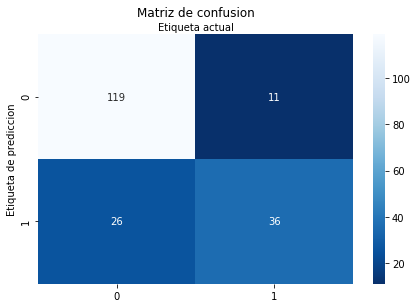

In [66]:
fig, ax = plt.subplots()

# Muestra en el plot los datos de la matriz de confusion:
# annot: Si muestra o no los valores que hay en la matriz
# cmap: colores a utilizar, el "_r" significa que los blancos seran los valores mas altos y no viceversa
# fmt: Modo de formateo de los valores mostrados
sns.heatmap(confusion_matrix, annot=True, cmap='Blues_r', fmt='g')

plt.tight_layout()

ax.xaxis.set_label_position('top')
plt.title('Matriz de confusion')
plt.ylabel('Etiqueta de prediccion')
plt.xlabel('Etiqueta actual')

plt.show()

In [67]:
print('Exactitud:', metrics.accuracy_score(Y_test, y_pred))

Exactitud: 0.8072916666666666
